In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

RANDOM_SEED = 42

# Specify each path
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier.keras'
tflite_save_path = 'keypoint_classifier.tflite'

# Set number of classes
NUM_CLASSES = 37
INPUT_SHAPE = 42

# Dataset reading
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

# Split into train/validation/test
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, 
    test_size=0.2, 
    random_state=RANDOM_SEED,
    stratify=y_dataset
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_train
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Model building
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(INPUT_SHAPE,)),
    
    # First block
    tf.keras.layers.Dense(128, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Second block
    tf.keras.layers.Dense(64, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Third block
    tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Output layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train Model
print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val), 
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Model summary
model.summary()

Training set: (4227, 42)
Validation set: (1057, 42)
Test set: (1321, 42)

Training model...
Epoch 1/100
107/133 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.0631 - loss: 3.5942
Epoch 1: val_accuracy improved from None to 0.22895, saving model to keypoint_classifier.keras

Epoch 1: finished saving model to keypoint_classifier.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1190 - loss: 3.3228 - val_accuracy: 0.2289 - val_loss: 2.9546 - learning_rate: 0.0010
Epoch 2/100
 94/133 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.2403 - loss: 2.7974
Epoch 2: val_accuracy improved from 0.22895 to 0.43614, saving model to keypoint_classifier.keras

Epoch 2: finished saving model to keypoint_classifier.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2751 - loss: 2.6506 - val_accuracy: 0.4361 - val_loss: 2.2213 - learning_rate: 0.0010
Epoch 3/100
 89/133 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.3489 - loss: 2.3221
Epoch 3: val_accuracy improved from 0.4361

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 37)             │         1,221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,977 (206.95 KB)

 Trainable params: 17,509 (68.39 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 35,020 (136.80 KB)


Evaluating on test set...
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9341 - loss: 0.2393 
Test Accuracy: 0.9341
Test Loss: 0.2393


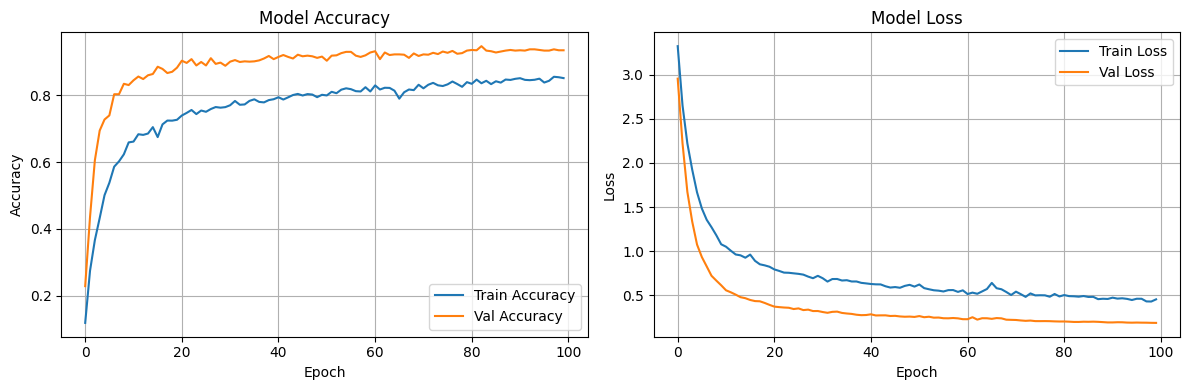


Loading best model...

Generating predictions for test set...
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Confusion Matrix and Classification Report:


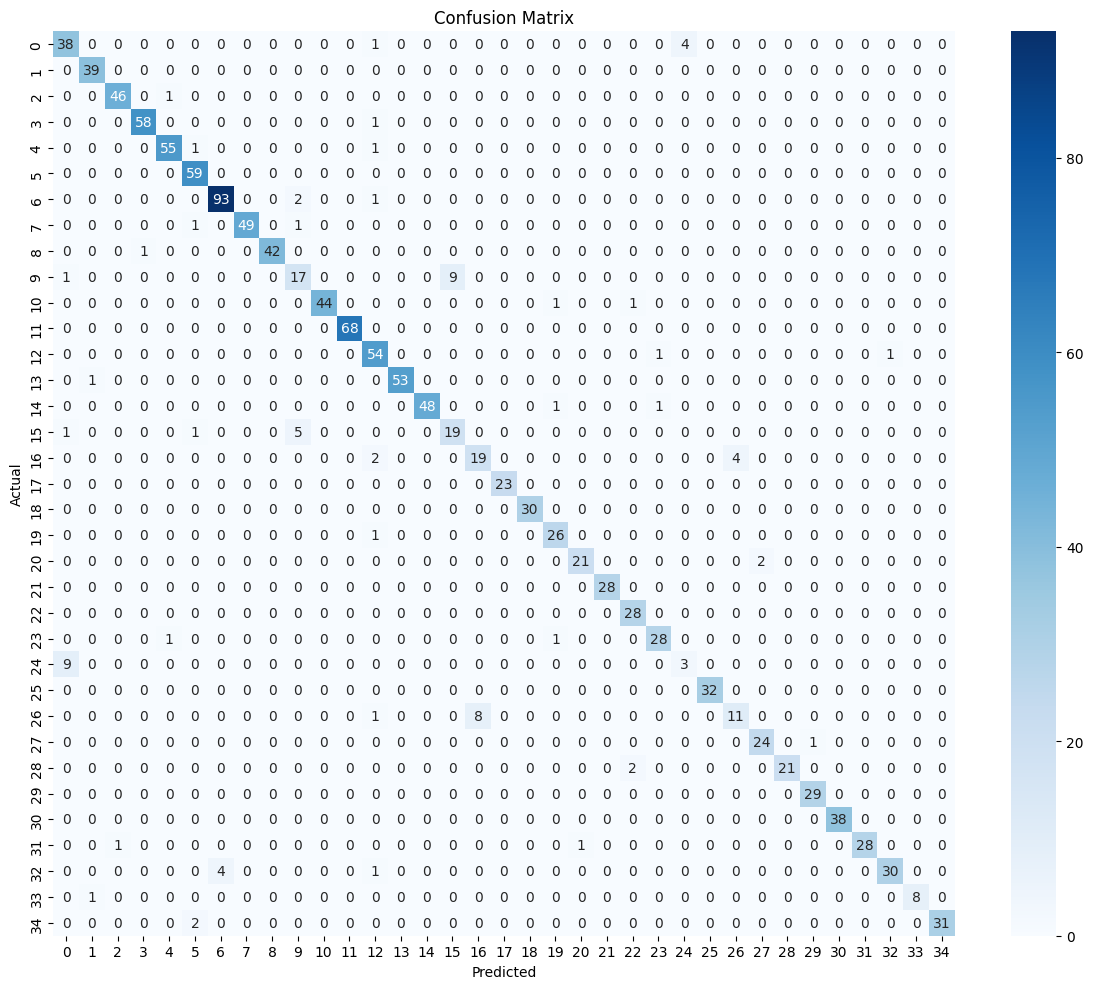


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.95      1.00      0.97        39
           2       0.98      0.98      0.98        47
           3       0.98      0.98      0.98        59
           4       0.96      0.96      0.96        57
           5       0.92      1.00      0.96        59
           6       0.96      0.97      0.96        96
           7       1.00      0.96      0.98        51
           8       1.00      0.98      0.99        43
           9       0.68      0.63      0.65        27
          10       1.00      0.96      0.98        46
          11       1.00      1.00      1.00        68
          12       0.86      0.96      0.91        56
          13       1.00      0.98      0.99        54
          14       1.00      0.96      0.98        50
          15       0.68      0.73      0.70        26
          16       0.70      0.76      0.73        25
   

In [2]:
# Model evaluation on test set
print("\nEvaluating on test set...")
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Loading the saved model (best model from checkpoint)
print("\nLoading best model...")
model = tf.keras.models.load_model(model_save_path)

# Confusion matrix
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False, cmap='Blues')
    ax.set_ylim(len(set(y_true)), 0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    if report:
        print('\nClassification Report:')
        print(classification_report(y_true, y_pred))

print("\nGenerating predictions for test set...")
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print("\nConfusion Matrix and Classification Report:")
print_confusion_matrix(y_test, y_pred)

In [3]:
# Save as a model dedicated to inference
print("\nSaving final model...")
model.save(model_save_path, include_optimizer=False)
print(f"Model saved to {model_save_path}")

# Honestly do not need the bottom part again since we already saved the right model

# Transform model (quantization for TFLite)
print("\nConverting to TFLite with quantization...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save TFLite model properly
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)
print(f"TFLite model saved to {tflite_save_path}")

# Test TFLite model
print("\nTesting TFLite model inference...")
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

# Get input/output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare test sample with correct dtype
test_sample = np.array([X_test[0]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], test_sample)

# Run inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Display results
print(f"\nTFLite Model Results:")
print(f"Probabilities: {np.squeeze(tflite_results)}")
print(f"Predicted class: {np.argmax(np.squeeze(tflite_results))}")
print(f"Actual class: {y_test[0]}")
print(f"Confidence: {np.max(np.squeeze(tflite_results)):.2%}")


Saving final model...
Model saved to keypoint_classifier.keras

Converting to TFLite with quantization...
INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmp3_s_1frl/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmp3_s_1frl/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmp3_s_1frl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  6062140944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062141712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062141136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062130192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062140368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062141904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062137872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6087115792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6087116752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6087115408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6062139600: TensorSpec(shape=

W0000 00:00:1768704286.139639   68705 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768704286.139801   68705 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 19:44:46.139987: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmp3_s_1frl
2026-01-17 19:44:46.140524: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 19:44:46.140529: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmp3_s_1frl
I0000 00:00:1768704286.145554   68705 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2026-01-17 19:44:46.146566: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 19:44:46.182901: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder